# Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_finance import candlestick_ohlc
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.preprocessing import normalize
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import scale
from sklearn import metrics


from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
from mpl_finance import candlestick_ohlc
import warnings
from sklearn import preprocessing

# Import des données

In [2]:
actions_df = pd.read_csv("./yahoofinance-GOOG-20040819-20180120.csv",sep=",")

In [3]:
actions_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [4]:
actions_df.shape

(3379, 7)

In [5]:
actions_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Isoler les données des trente derniers jours enregistrés

In [6]:
DernierMois = actions_df.tail(30)
DernierMois

,Date,Open,High,Low,Close,Adj Close,Volume
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500
3354,2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700
3355,2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700
3356,2017-12-15,1054.609985,1067.619995,1049.500000,1064.189941,1064.189941,3275900
3357,2017-12-18,1066.079956,1078.489990,1062.000000,1077.140015,1077.140015,1554600
3358,2017-12-19,1075.199951,1076.839966,1063.550049,1070.680054,1070.680054,1338700


# Ajouts des colonnes

In [7]:
moyenne = DernierMois.apply ( lambda row : ((row["Close"] + row["High"]) + row["Low"]) / 3, axis = 1 ) 
DernierMois ["moyenne"] = moyenne

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
import time

start_time = time.time()
moyenne = DernierMois.apply ( lambda row : ((row["Close"] + row["High"]) + row["Low"]) / 3, axis = 1 ) 
interval = time.time() - start_time
print ('Total time in seconds:', interval)

Total time in seconds: 0.0029921531677246094


In [9]:
DernierMois

,Date,Open,High,Low,Close,Adj Close,Volume,moyenne
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327
3354,2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700,1041.885010
3355,2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700,1050.253336
3356,2017-12-15,1054.609985,1067.619995,1049.500000,1064.189941,1064.189941,3275900,1060.436645
3357,2017-12-18,1066.079956,1078.489990,1062.000000,1077.140015,1077.140015,1554600,1072.543335
3358,2017-12-19,1075.199951,1076.839966,1063.550049,1070.680054,1070.680054,1338700,1070.356690


In [10]:
variation = DernierMois.apply ( lambda row : ((row["Close"] - row["Open"])), axis = 1 ) 
DernierMois ["variation"] = variation

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
DernierMois

,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975
3354,2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700,1041.885010,-5.510010
3355,2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700,1050.253336,4.150024
3356,2017-12-15,1054.609985,1067.619995,1049.500000,1064.189941,1064.189941,3275900,1060.436645,9.579956
3357,2017-12-18,1066.079956,1078.489990,1062.000000,1077.140015,1077.140015,1554600,1072.543335,11.060059
3358,2017-12-19,1075.199951,1076.839966,1063.550049,1070.680054,1070.680054,1338700,1070.356690,-4.519897


In [12]:
DernierMois ["variation_relative"] = DernierMois['variation'] / DernierMois['moyenne']
DernierMois

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005,0.016633
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061,0.010217
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941,-0.000424
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976,0.005390
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975,0.000816
3354,2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700,1041.885010,-5.510010,-0.005289
3355,2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700,1050.253336,4.150024,0.003951
3356,2017-12-15,1054.609985,1067.619995,1049.500000,1064.189941,1064.189941,3275900,1060.436645,9.579956,0.009034
3357,2017-12-18,1066.079956,1078.489990,1062.000000,1077.140015,1077.140015,1554600,1072.543335,11.060059,0.010312
3358,2017-12-19,1075.199951,1076.839966,1063.550049,1070.680054,1070.680054,1338700,1070.356690,-4.519897,-0.004223


In [13]:
DernierMois ["ampli_relative"] = (DernierMois['High'] - DernierMois['Low'])/DernierMois['moyenne']
DernierMois

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005,0.016633,0.023482
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061,0.010217,0.015732
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941,-0.000424,0.009186
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976,0.005390,0.011309
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975,0.000816,0.015958
3354,2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700,1041.885010,-5.510010,-0.005289,0.007952
3355,2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700,1050.253336,4.150024,0.003951,0.014654
3356,2017-12-15,1054.609985,1067.619995,1049.500000,1064.189941,1064.189941,3275900,1060.436645,9.579956,0.009034,0.017087
3357,2017-12-18,1066.079956,1078.489990,1062.000000,1077.140015,1077.140015,1554600,1072.543335,11.060059,0.010312,0.015375
3358,2017-12-19,1075.199951,1076.839966,1063.550049,1070.680054,1070.680054,1338700,1070.356690,-4.519897,-0.004223,0.012416


In [14]:
DernierMois ["variation_jour"] = DernierMois['moyenne'].diff()
DernierMois.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005,0.016633,0.023482,NaN
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061,0.010217,0.015732,12.917012
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941,-0.000424,0.009186,9.460348
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976,0.005390,0.011309,1.776001
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975,0.000816,0.015958,2.509969


In [15]:
DernierMois['variation_jour_relative'] = DernierMois['variation_jour'] / DernierMois['moyenne']
DernierMois.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative
3349,2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005,0.016633,0.023482,NaN,NaN
3350,2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061,0.010217,0.015732,12.917012,0.012568
3351,2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941,-0.000424,0.009186,9.460348,0.009121
3352,2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976,0.005390,0.011309,1.776001,0.001709
3353,2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975,0.000816,0.015958,2.509969,0.002410


# Représentation

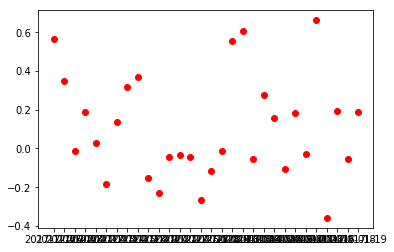

In [16]:
plt.plot(DernierMois['Date'],DernierMois['variation']/30, 'ro')
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


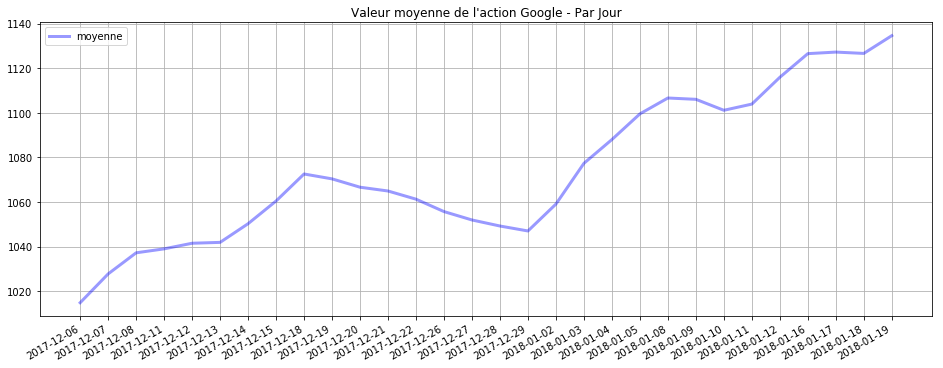

In [17]:
#graphique de l'evolution de l'action
plt.figure(figsize=(16,6))
plt.plot_date(DernierMois["Date"], DernierMois["moyenne"], fmt="-b", linewidth=3, alpha=.4, label="moyenne")
plt.gcf().autofmt_xdate()

plt.title("Valeur moyenne de l'action Google - Par Jour")
plt.grid()
plt.legend(loc="best")
plt.show();

In [18]:
DernierMois['Date'] = pd.to_datetime(DernierMois['Date'])
DernierMois['Date'].head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3349   2017-12-06
3350   2017-12-07
3351   2017-12-08
3352   2017-12-11
3353   2017-12-12
Name: Date, dtype: datetime64[ns]

In [19]:
DernierMois.dtypes

Date                       datetime64[ns]
Open                              float64
High                              float64
Low                               float64
Close                             float64
Adj Close                         float64
Volume                              int64
moyenne                           float64
variation                         float64
variation_relative                float64
ampli_relative                    float64
variation_jour                    float64
variation_jour_relative           float64
dtype: object

In [20]:
import matplotlib.dates as mdates

#DernierMois['Date'] = mdates.date2num(DernierMois['Date'])

In [21]:
DernierMois.dtypes

Date                       datetime64[ns]
Open                              float64
High                              float64
Low                               float64
Close                             float64
Adj Close                         float64
Volume                              int64
moyenne                           float64
variation                         float64
variation_relative                float64
ampli_relative                    float64
variation_jour                    float64
variation_jour_relative           float64
dtype: object

# Indexation de la colonne Date

In [22]:
#DernierMois = DernierMois.set_index('Date')
DernierMois['Date'] = pd.to_datetime(DernierMois['Date'])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# candlestick_ohlc

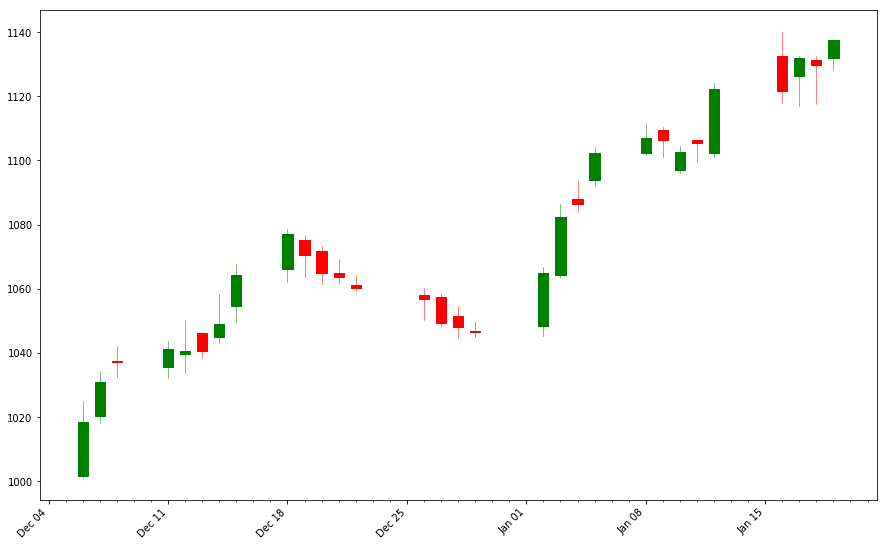

In [23]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

# Importation de librairie dates pour manipuler la colonne 'Date'
fig, ax = plt.subplots(figsize = (15,10))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Méthode de visualisation Candle
candlestick_ohlc(ax, zip(mdates.date2num(DernierMois['Date']), 
                         DernierMois["Open"], DernierMois["High"],
                         DernierMois["Low"], DernierMois["Close"]),
                         colorup = "g", colordown = "r", width = 0.6)

# Amélioration de la légende des dates
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
ax.autoscale_view()

plt.show()

# Normalisation

In [65]:
DernierMois = DernierMois.set_index('Date')

In [66]:
DernierMois = DernierMois.fillna(0)

In [67]:
#DernierMois.reset_index(inplace=True)

In [68]:
DernierMois.head()

,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative
Date,,,,,,,,,,,,
2017-12-06,1001.500000,1024.969971,1001.140015,1018.380005,1018.380005,1272000,1014.829997,16.880005,0.016633,0.023482,0.000000,0.000000
2017-12-07,1020.429993,1034.239990,1018.070984,1030.930054,1030.930054,1458200,1027.747009,10.500061,0.010217,0.015732,12.917012,0.012568
2017-12-08,1037.489990,1042.050049,1032.521973,1037.050049,1037.050049,1290800,1037.207357,-0.439941,-0.000424,0.009186,9.460348,0.009121
2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800,1038.983358,5.599976,0.005390,0.011309,1.776001,0.001709
2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500,1041.493327,0.849975,0.000816,0.015958,2.509969,0.002410


In [69]:
DernierMois.dtypes

Open                       float64
High                       float64
Low                        float64
Close                      float64
Adj Close                  float64
Volume                       int64
moyenne                    float64
variation                  float64
variation_relative         float64
ampli_relative             float64
variation_jour             float64
variation_jour_relative    float64
dtype: object

In [71]:
from sklearn import preprocessing

preprocessing.normalize(DernierMois.values, norm='l2', axis=1, copy=True)

array([[ 7.87341268e-04,  8.05792468e-04,  7.87058262e-04,
         8.00611687e-04,  8.00611687e-04,  9.99998096e-01,
         7.97820806e-04,  1.32704189e-05,  1.30764945e-08,
         1.84604382e-08,  0.00000000e+00,  0.00000000e+00],
       [ 6.99786363e-04,  7.09256927e-04,  6.98168611e-04,
         7.06987052e-04,  7.06987052e-04,  9.99998512e-01,
         7.04804197e-04,  7.20068946e-06,  7.00628598e-09,
         1.07889545e-08,  8.85817659e-06,  8.61902444e-09],
       [ 8.03755795e-04,  8.07288527e-04,  7.99907013e-04,
         8.03414968e-04,  8.03414968e-04,  9.99998063e-01,
         8.03536836e-04, -3.40827508e-07, -3.28601129e-10,
         7.11671913e-09,  7.32904349e-06,  7.06613142e-09],
       [ 8.68123444e-04,  8.75081886e-04,  8.65231138e-04,
         8.72818249e-04,  8.72818249e-04,  9.99997725e-01,
         8.71043758e-04,  4.69480488e-06,  4.51865263e-09,
         9.48114212e-09,  1.48893105e-06,  1.43306535e-09],
       [ 8.12526722e-04,  8.20873758e-04,  8.0788424

# Fonction opérations 5 et 8

In [72]:
def colonnes_norm(DernierMois):
    #création des colonnes
    DernierMois["moyenne"] = (DernierMois["Close"] + DernierMois["High"] + DernierMois["Low"]) / 3.0
    DernierMois["variation"] = DernierMois["Close"] - DernierMois["Open"]
    DernierMois ["variation_relative"] = DernierMois['variation'] / DernierMois['moyenne']
    DernierMois ["ampli_relative"] = (DernierMois['High'] - DernierMois['Low'])/DernierMois['moyenne']
    DernierMois ["variation_jour"] = DernierMois['moyenne'].diff()
    DernierMois['variation_jour_relative'] = DernierMois['variation_jour'] / DernierMois['moyenne']
    #normalisation
    DernierMois.fillna(0, inplace=True)
    df_norm=preprocessing.normalize(DernierMois.values, norm='l2', axis=1, copy=True)
    DernierMois = pd.DataFrame(df_norm, columns=DernierMois.columns, index=DernierMois.index)
    #DernierMois.set_index('Date')
    return DernierMois

# Fonction téléchargement

In [73]:
import requests
from urllib.request import urlopen
from datetime import datetime, timedelta
import time

In [74]:
def telechargement(symbole, derniersJours=30):
    # dates de debut et de fin
    dateFin = datetime.today()
    dateDebut = dateFin - timedelta(days=derniersJours)
    x = int(time.mktime(dateDebut.timetuple()))
    y = int(time.mktime(dateFin.timetuple()))
    url = "https://query1.finance.yahoo.com/v7/finance/download/"+symbole+"?period1="+str(x)+"&period2="+str(y)+"&interval=1d&events=history&crumb=osPYmrnpcIy"
    # Lecture des donnees depuis Yahoo finance
    reponse = requests.post(url)
    if reponse.ok == True:
        z = open('csvfile.csv','w')
        z.write(reponse.text)
        z.close()
        DernierMois=pd.read_csv('csvfile.csv', index_col=0, parse_dates=True,infer_datetime_format=True)
        DernierMois = colonnes_norm(DernierMois)
        DernierMois["symbole"] = symbole
        return DernierMois
    else: print("pas de symbole pour :",symbole)


In [75]:
telechargement("GOOG").head()

,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole
Date,,,,,,,,,,,,,
2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,0.000003,2.143206e-09,1.043263e-08,0.000000,0.000000e+00,GOOG
2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,0.000002,2.028866e-09,1.019188e-08,0.000009,7.512193e-09,GOOG
2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,0.000003,2.213456e-09,8.443104e-09,0.000007,5.887152e-09,GOOG
2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-0.000002,-1.704802e-09,4.483362e-09,0.000002,1.670390e-09,GOOG
2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,0.000016,1.281488e-08,2.072316e-08,0.000005,4.407933e-09,GOOG


In [76]:
df = telechargement("GOOG")

In [77]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole
Date,,,,,,,,,,,,,
2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,0.000003,2.143206e-09,1.043263e-08,0.000000,0.000000e+00,GOOG
2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,0.000002,2.028866e-09,1.019188e-08,0.000009,7.512193e-09,GOOG
2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,0.000003,2.213456e-09,8.443104e-09,0.000007,5.887152e-09,GOOG
2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-0.000002,-1.704802e-09,4.483362e-09,0.000002,1.670390e-09,GOOG
2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,0.000016,1.281488e-08,2.072316e-08,0.000005,4.407933e-09,GOOG


In [78]:
actions_dict={"GOOG": "Google",
            "FB": "Facebook, Inc.",
            "AAPL": "Apple Inc.",
            "MSFT": "Microsoft Corporation",
            "HPQ": "Hewlett-Packard Company",
            "INTC": "Intel Corporation",
            "NVDA": "NVIDIA Corporation",
            "TXN": "Texas Instruments Incorporated",
            "IBM": "International Business Machines Corp. (IBM)",
            "SAP": "SAP SE (ADR)",
            "ADBE": "Adobe Systems Incorporated",
            "ADSK": "Autodesk, Inc.",
            "CRM": "salesforce.com, inc.",
            "N": "NetSuite Inc",
            "VMW": "VMware, Inc.",
            "CTXS": "Citrix Systems, Inc.",
            "RHT": "Red Hat Inc",
            "RAX": "Rackspace Hosting, Inc.",
            "AMZN": "Amazon.com, Inc.",
            "NWSA": "News Corp",
            "EBAY": "eBay Inc",
            "CBS": "CBS Corporation",
            "CMCSA": "Comcast Corporation",
            "VIAB": "Viacom, Inc.",
            "NFLX": "Netflix, Inc.",
            "TWX": "Time Warner Inc",
            "FOXA": "Twenty-First Century Fox Inc",
            "NYT": "The New York Times Company",
            "TRI": "Thomson Reuters Corporation (USA)",
            "DIS": "The Walt Disney Company",
            "SNE": "Sony Corp (ADR)",
            "PCRFY": "Panasonic Corporation (ADR)",
            "CAJ": "Canon Inc (ADR)",
            "TOSYY": "Toshiba Corp (USA)",
            "BBRY": "BlackBerry Ltd",
            "CSC": "Computer Sciences Corporation",
            "GE": "General Electric Company",
            "HTHIY": "Hitachi, Ltd. (ADR)",
            "SIEGY": "Siemens AG (ADR)",
            "CVX": "Chevron Corporation",
            "XOM": "Exxon Mobil Corporation",
            "BP": "BP plc (ADR)",
            "CAT": "Caterpillar Inc.",
            "LXK": "Lexmark International Inc",
            "BKS": "Barnes & Noble, Inc.",
            "FJTSY": "Fujitsu Ltd (ADR)",
            "EMC": "EMC Corporation",
            "ORCL": "Oracle Corporation",
            "CSCO": "Cisco Systems, Inc.",
            "XRX": "Xerox Corp",
           }

In [79]:
actions_data = pd.DataFrame.from_dict(actions_dict, orient='index')
actions_data = actions_data.reset_index()
actions_data.columns = ['symbole' , 'noms']
actions_data.head()

,symbole,noms
0,GOOG,Google
1,FB,"Facebook, Inc."
2,AAPL,Apple Inc.
3,MSFT,Microsoft Corporation
4,HPQ,Hewlett-Packard Company


In [80]:
#Téléchargement des données
liste = []
for symbole in actions_data["symbole"]:
    temp_data = telechargement(symbole)
    liste.append(temp_data)

pas de symbole pour : N
pas de symbole pour : RAX
pas de symbole pour : TWX
pas de symbole pour : BBRY
pas de symbole pour : CSC
pas de symbole pour : LXK
pas de symbole pour : EMC


In [81]:
print(liste)

[                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2019-04-15  0.001026  0.001031  0.001018  0.001028   0.001028  0.999997   
2019-04-16  0.001431  0.001437  0.001425  0.001433   0.001433  0.999994   
2019-04-17  0.001009  0.001015  0.001005  0.001012   0.001012  0.999997   
2019-04-18  0.000930  0.000933  0.000927  0.000928   0.000928  0.999997   
2019-04-22  0.001531  0.001547  0.001521  0.001547   0.001547  0.999993   
2019-04-23  0.000948  0.000961  0.000944  0.000958   0.000958  0.999997   
2019-04-24  0.001241  0.001245  0.001232  0.001233   0.001233  0.999995   
2019-04-25  0.001142  0.001145  0.001131  0.001141   0.001141  0.999996   
2019-04-26  0.001022  0.001026  0.001015  0.001025   0.001025  0.999997   
2019-04-29  0.000510  0.000516  0.000507  0.000515   0.000515  0.999999   
2019-04-30  0.000191  0.000192  0.000189  0.000191   0.000191  1.000000   
2019-05-01  0.000450  0.

In [82]:
actions_df = pd.concat(liste)
actions_df.head()

,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole
Date,,,,,,,,,,,,,
2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,0.000003,2.143206e-09,1.043263e-08,0.000000,0.000000e+00,GOOG
2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,0.000002,2.028866e-09,1.019188e-08,0.000009,7.512193e-09,GOOG
2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,0.000003,2.213456e-09,8.443104e-09,0.000007,5.887152e-09,GOOG
2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-0.000002,-1.704802e-09,4.483362e-09,0.000002,1.670390e-09,GOOG
2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,0.000016,1.281488e-08,2.072316e-08,0.000005,4.407933e-09,GOOG


In [83]:
actions_df = actions_df.reset_index()
actions_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole
0,2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,0.000003,2.143206e-09,1.043263e-08,0.000000,0.000000e+00,GOOG
1,2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,0.000002,2.028866e-09,1.019188e-08,0.000009,7.512193e-09,GOOG
2,2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,0.000003,2.213456e-09,8.443104e-09,0.000007,5.887152e-09,GOOG
3,2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-0.000002,-1.704802e-09,4.483362e-09,0.000002,1.670390e-09,GOOG
4,2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,0.000016,1.281488e-08,2.072316e-08,0.000005,4.407933e-09,GOOG


In [84]:
actions_df = pd.merge(actions_df, actions_data, how='right', on=['symbole'])
actions_df

,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole,noms
0,2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,2.610718e-06,2.143206e-09,1.043263e-08,0.000000e+00,0.000000e+00,GOOG,Google
1,2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,2.487437e-06,2.028866e-09,1.019188e-08,9.210124e-06,7.512193e-09,GOOG,Google
2,2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,2.733412e-06,2.213456e-09,8.443104e-09,7.270083e-06,5.887152e-09,GOOG,Google
3,2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-2.109965e-06,-1.704802e-09,4.483362e-09,2.067374e-06,1.670390e-09,GOOG,Google
4,2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,1.591711e-05,1.281488e-08,2.072316e-08,5.475006e-06,4.407933e-09,GOOG,Google
5,2019-04-23,0.000948,0.000961,0.000944,0.000958,0.000958,0.999997,0.000955,1.050085e-05,8.334161e-09,1.360153e-08,1.355909e-05,1.076138e-08,GOOG,Google
6,2019-04-24,0.001241,0.001245,0.001232,0.001233,0.001233,0.999995,0.001236,-7.970120e-06,-6.327149e-09,1.013748e-08,-3.010207e-07,-2.389679e-10,GOOG,Google
7,2019-04-25,0.001142,0.001145,0.001131,0.001141,0.001141,0.999996,0.001139,-1.192147e-06,-9.454257e-10,1.101358e-08,1.167378e-06,9.257834e-10,GOOG,Google
8,2019-04-26,0.001022,0.001026,0.001015,0.001025,0.001025,0.999997,0.001022,2.561659e-06,2.019403e-09,8.096524e-09,6.090418e-06,4.801188e-09,GOOG,Google
9,2019-04-29,0.000510,0.000516,0.000507,0.000515,0.000515,0.999999,0.000513,5.433282e-06,4.241278e-09,7.175521e-09,5.011209e-06,3.911803e-09,GOOG,Google


In [103]:
#Preparartion des données au clustering
def pivot_data(actions_df, values="variation_jour_relative"):
    clustering_data = actions_df.pivot(index="symbole", columns="Date", values=values)
    return clustering_data
clustering_data = pivot_data(actions_df, values="variation_jour_relative")
clustering_data.head()

Date,NaT,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00
symbole,,,,,,,,,,,,,,,,,,,,
AAPL,NaN,0.0,1.357425e-10,3.395832e-10,3.662261e-10,1.076236e-10,5.069258e-10,3.259382e-10,-3.951973e-10,-5.911011e-10,2.213519e-10,-4.011558e-10,7.743650e-10,-2.545222e-10,2.937617e-10,-6.454392e-10,-4.098965e-10,-6.970951e-11,-5.226574e-10,-4.231138e-10
ADBE,NaN,0.0,-1.566207e-09,-2.011910e-09,-1.543235e-09,5.132818e-09,6.825159e-09,1.224453e-09,4.748931e-10,4.613484e-09,4.863776e-09,3.922106e-10,-3.816753e-09,-7.249982e-09,7.060384e-09,-6.317082e-09,-5.761093e-09,-9.653091e-10,-3.635292e-09,2.641955e-09
ADSK,NaN,0.0,1.818800e-09,-9.882522e-09,-6.866444e-09,1.405523e-08,1.174718e-08,7.654086e-09,-4.031389e-09,4.028448e-09,5.033269e-09,7.363208e-10,-7.623894e-09,-1.443096e-08,1.637292e-08,-1.065486e-08,-7.659237e-09,3.900580e-10,-4.833182e-09,7.283748e-09
AMZN,NaN,0.0,4.130928e-09,1.290658e-09,-6.333951e-10,1.549150e-09,4.549676e-09,-6.177335e-10,-1.314520e-10,1.525785e-09,1.247034e-09,-2.950549e-09,-1.930725e-10,-2.719272e-09,4.239540e-09,-1.357672e-09,-1.366666e-09,-4.398945e-10,-2.580260e-09,-1.099907e-09
BBRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
clustering_data = clustering_data.drop(clustering_data.columns[0], axis = 1)

In [105]:
clustering_data.head()

Date,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00
symbole,,,,,,,,,,,,,,,,,,,
AAPL,0.0,1.357425e-10,3.395832e-10,3.662261e-10,1.076236e-10,5.069258e-10,3.259382e-10,-3.951973e-10,-5.911011e-10,2.213519e-10,-4.011558e-10,7.743650e-10,-2.545222e-10,2.937617e-10,-6.454392e-10,-4.098965e-10,-6.970951e-11,-5.226574e-10,-4.231138e-10
ADBE,0.0,-1.566207e-09,-2.011910e-09,-1.543235e-09,5.132818e-09,6.825159e-09,1.224453e-09,4.748931e-10,4.613484e-09,4.863776e-09,3.922106e-10,-3.816753e-09,-7.249982e-09,7.060384e-09,-6.317082e-09,-5.761093e-09,-9.653091e-10,-3.635292e-09,2.641955e-09
ADSK,0.0,1.818800e-09,-9.882522e-09,-6.866444e-09,1.405523e-08,1.174718e-08,7.654086e-09,-4.031389e-09,4.028448e-09,5.033269e-09,7.363208e-10,-7.623894e-09,-1.443096e-08,1.637292e-08,-1.065486e-08,-7.659237e-09,3.900580e-10,-4.833182e-09,7.283748e-09
AMZN,0.0,4.130928e-09,1.290658e-09,-6.333951e-10,1.549150e-09,4.549676e-09,-6.177335e-10,-1.314520e-10,1.525785e-09,1.247034e-09,-2.950549e-09,-1.930725e-10,-2.719272e-09,4.239540e-09,-1.357672e-09,-1.366666e-09,-4.398945e-10,-2.580260e-09,-1.099907e-09
BBRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


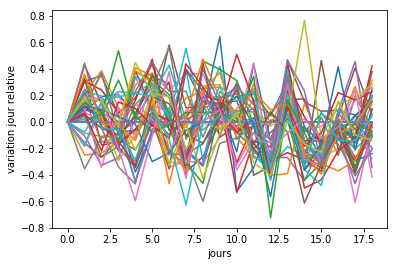

In [106]:
#Nettoyage et Normalisation
clustering_data.fillna(0, inplace=True)

norm_data = normalize(clustering_data.values, axis=1)
norm_data = pd.DataFrame(norm_data)
for item in norm_data.values:
    plt.plot(item)
    
plt.ylabel("variation jour relative")
plt.xlabel("jours")
plt.show();

In [107]:
finance = scale(norm_data)

In [108]:
finance = linkage(finance,method='ward',metric='euclidean')

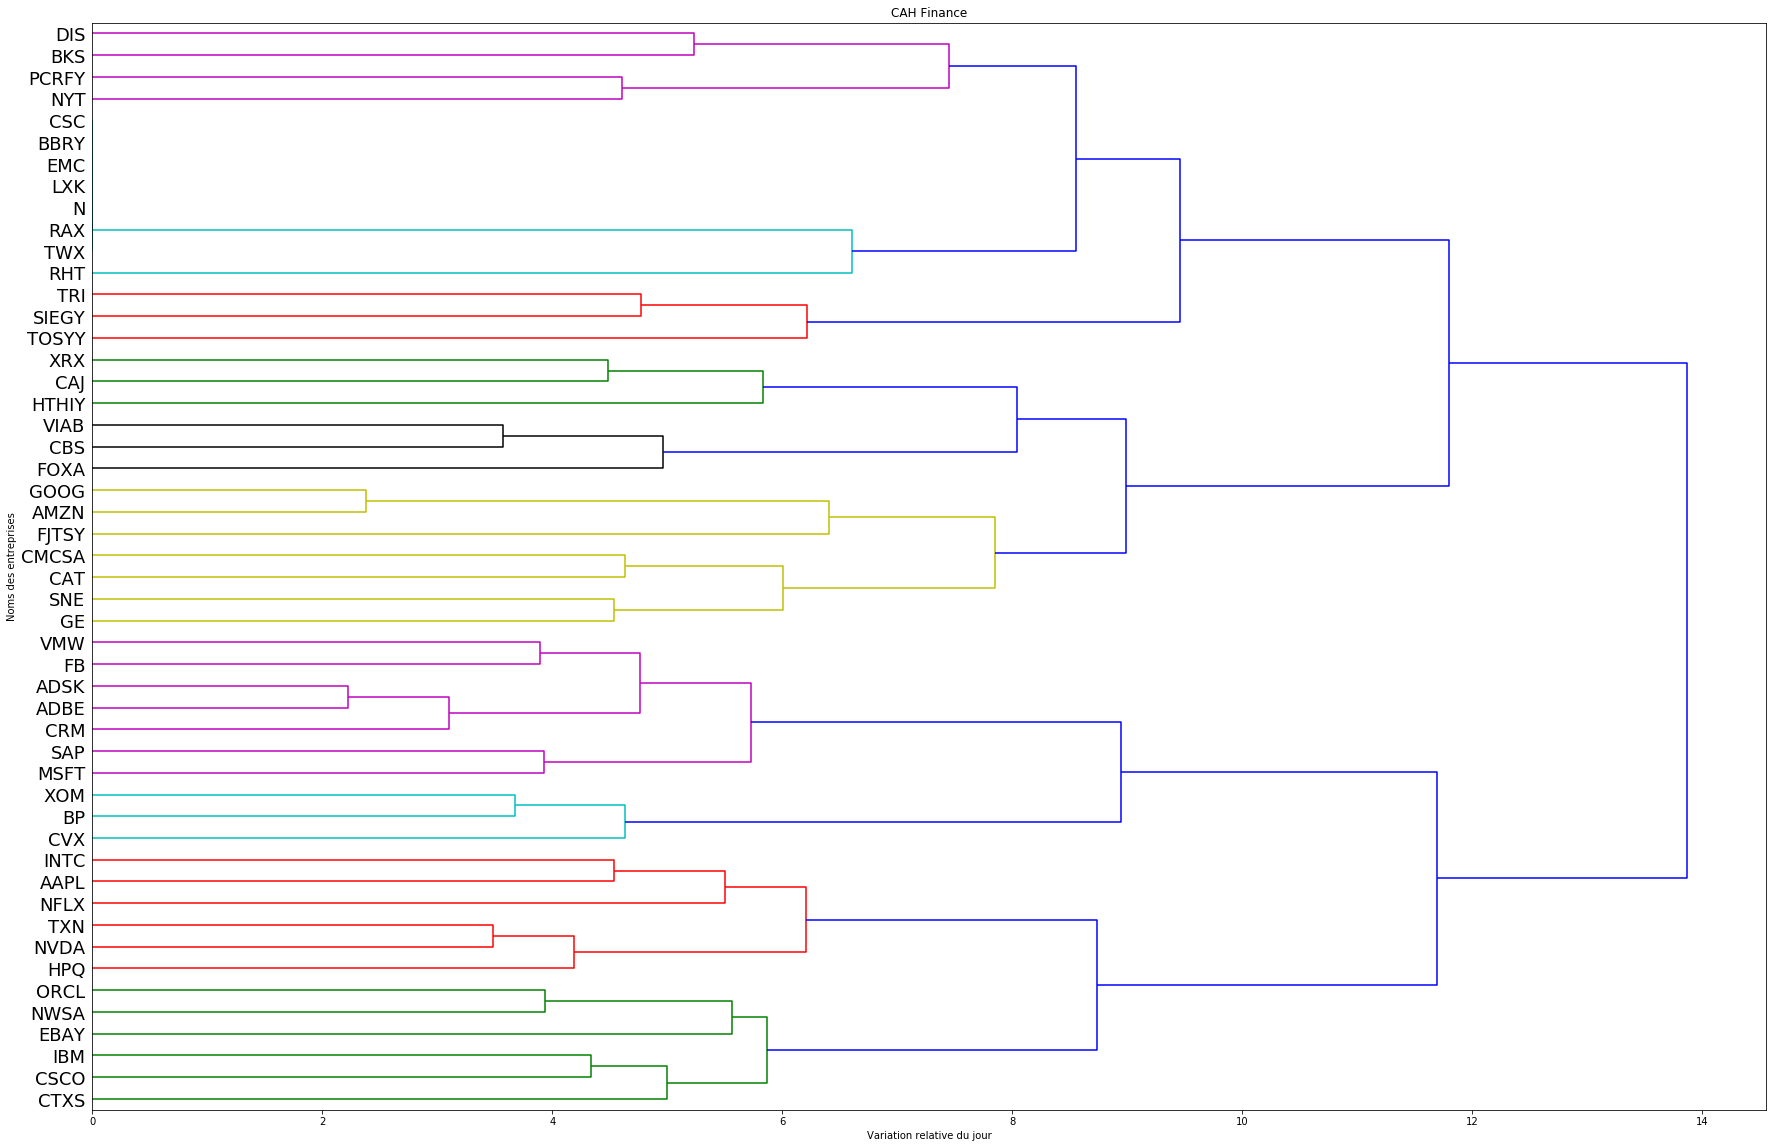

In [109]:
plt.figure(figsize=(30, 20))
plt.title('CAH Finance')
plt.xlabel('Variation relative du jour')
plt.ylabel('Noms des entreprises')

dendrogram(finance, labels = clustering_data.index, orientation='right', leaf_font_size=18, color_threshold=8)
plt.show()

In [110]:
finance_cah = fcluster(finance,t=8,criterion='distance')
print(finance_cah)

[ 2  4  4  5  9 10  3  7  5  6  5  4  9  1  1  3 10  1  9  4  5  6  5  5
  2  7  1  2  9  4  9  2  2  1 10  1 10  9  9  4  8  5  8  8  9  2  6  4
  3  7]


In [111]:
finance_cluster = np.argsort(finance_cah)
finance_cluster

array([35, 33, 26, 17, 14, 13,  0, 45, 32, 31, 27, 24, 15,  6, 48, 39, 29,
        1, 47,  2, 19, 11, 41,  3, 22, 20,  8, 10, 23, 46,  9, 21, 49,  7,
       25, 42, 40, 43, 44, 12, 37,  4, 28, 18, 38, 30, 36, 34,  5, 16],
      dtype=int64)

In [112]:
result_m=pd.DataFrame(clustering_data.index[finance_cah], finance_cluster[finance_cah])
result_m

,symbole
26,ADSK
14,BBRY
14,BBRY
13,BKS
31,CBS
27,CMCSA
17,AMZN
45,CAJ
13,BKS
0,BP


In [113]:
#Clustering
def cluster_data(data, n_clusters=8, normalize_data=False):
    if normalize_data:
        data = normalize(data.values, norm='l2', axis=1, copy=True)
    cluster_model = KMeans(n_clusters=n_clusters)
    prediction = cluster_model.fit_predict(data)
    return prediction, cluster_model, data

prediction, model, data = cluster_data(clustering_data, n_clusters=8, normalize_data=True)
print("Cluster Count: %s" % len(np.unique(prediction)))
clustering_data["Cluster"] = prediction
prediction

Cluster Count: 8


array([1, 4, 4, 0, 5, 5, 6, 7, 3, 3, 2, 4, 5, 3, 3, 6, 0, 4, 5, 4, 0, 5,
       3, 0, 1, 5, 3, 1, 5, 4, 5, 3, 1, 3, 7, 3, 2, 5, 5, 4, 2, 3, 2, 2,
       5, 3, 5, 4, 6, 7])

In [114]:
resultat = np.arange(8,dtype="double")
for i in np.arange(8):
    km = cluster.KMeans(n_clusters=i+2)
    km.fit(norm_data)
    resultat[i] = metrics.silhouette_score(norm_data,km.labels_)

In [115]:
kmeans_score = (metrics.silhouette_score(norm_data,km.labels_))
kmeans_score

0.16530176594580162

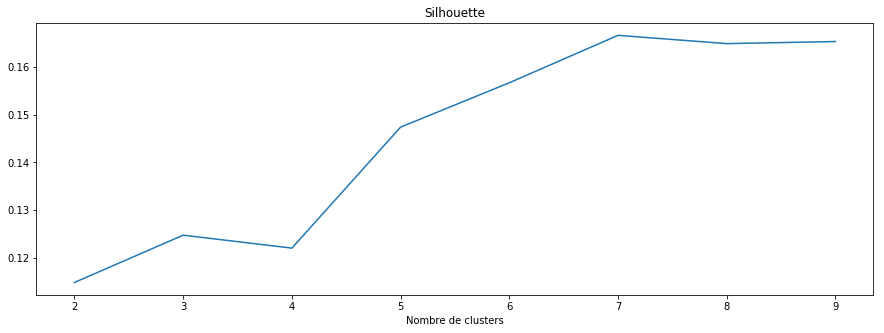

In [116]:
plt.figure(figsize=(15,5))
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(np.arange(2,10,1),resultat)
plt.show()

In [117]:
def kmeans_m():
    b = 0
    k = 2
    while k < 9:
        c = fcluster(finance, k, criterion='maxclust')
        s_score = (metrics.silhouette_score(norm_data, c))
        result_m.iloc[b] = s_score
        k += 1
        b += 1
    return result_m

In [118]:
kmeans_m()
result_m

,symbole
26,0.111495
14,0.107264
14,0.132965
13,0.142073
31,0.157397
27,0.170153
17,0.173041
45,CAJ
13,BKS
0,BP


In [132]:
actions_df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,moyenne,variation,variation_relative,ampli_relative,variation_jour,variation_jour_relative,symbole,noms
0,0,2019-04-15,0.001026,0.001031,0.001018,0.001028,0.001028,0.999997,0.001026,0.000003,2.143206e-09,1.043263e-08,0.000000,0.000000e+00,GOOG,Google
1,1,2019-04-16,0.001431,0.001437,0.001425,0.001433,0.001433,0.999994,0.001432,0.000002,2.028866e-09,1.019188e-08,0.000009,7.512193e-09,GOOG,Google
2,2,2019-04-17,0.001009,0.001015,0.001005,0.001012,0.001012,0.999997,0.001011,0.000003,2.213456e-09,8.443104e-09,0.000007,5.887152e-09,GOOG,Google
3,3,2019-04-18,0.000930,0.000933,0.000927,0.000928,0.000928,0.999997,0.000929,-0.000002,-1.704802e-09,4.483362e-09,0.000002,1.670390e-09,GOOG,Google
4,4,2019-04-22,0.001531,0.001547,0.001521,0.001547,0.001547,0.999993,0.001539,0.000016,1.281488e-08,2.072316e-08,0.000005,4.407933e-09,GOOG,Google


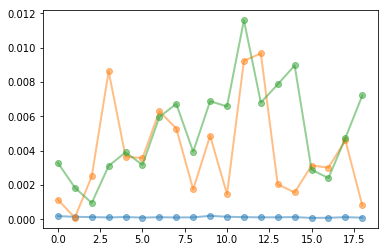

Cluster: 0
Members: ['AAPL: Apple Inc.', 'ADBE: Adobe Systems Incorporated', 'ADSK: Autodesk, Inc.', 'AMZN: Amazon.com, Inc.', 'BKS: Barnes & Noble, Inc.', 'BP: BP plc (ADR)', 'CAJ: Canon Inc (ADR)', 'CAT: Caterpillar Inc.', 'CBS: CBS Corporation', 'CMCSA: Comcast Corporation', 'CRM: salesforce.com, inc.', 'CSCO: Cisco Systems, Inc.', 'CTXS: Citrix Systems, Inc.', 'CVX: Chevron Corporation', 'DIS: The Walt Disney Company', 'EBAY: eBay Inc', 'FB: Facebook, Inc.', 'FJTSY: Fujitsu Ltd (ADR)', 'FOXA: Twenty-First Century Fox Inc', 'GE: General Electric Company', 'GOOG: Google', 'HPQ: Hewlett-Packard Company', 'IBM: International Business Machines Corp. (IBM)', 'INTC: Intel Corporation', 'MSFT: Microsoft Corporation', 'NFLX: Netflix, Inc.', 'NVDA: NVIDIA Corporation', 'NWSA: News Corp', 'NYT: The New York Times Company', 'ORCL: Oracle Corporation', 'PCRFY: Panasonic Corporation (ADR)', 'RHT: Red Hat Inc', 'SAP: SAP SE (ADR)', 'SIEGY: Siemens AG (ADR)', 'SNE: Sony Corp (ADR)', 'TRI: Thomson 

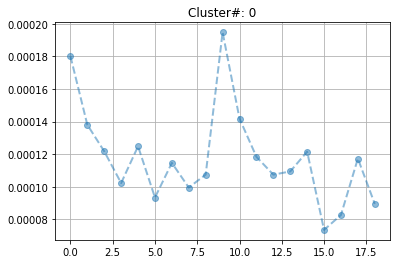

Cluster: 1
Members: ['TOSYY: Toshiba Corp (USA)']


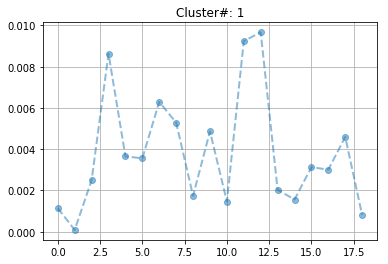

Cluster: 2
Members: ['HTHIY: Hitachi, Ltd. (ADR)']


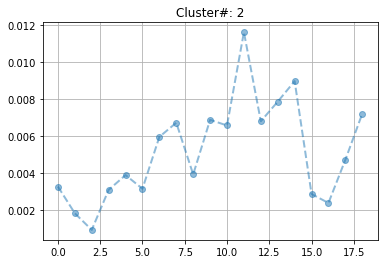

In [139]:
def visualiser_clusters(data_df, values="variation_jour_relative", n_clusters=8, normalize_data=False):
    data = pivot_data(data_df, values)
    data = data.dropna(axis=1,how='all')
    data = data.dropna(axis=0,how='any')
    prediction, model, c_data = cluster_data(data, n_clusters=n_clusters, normalize_data=normalize_data)
    c_data = pd.DataFrame(c_data, index=data.index,columns=data.columns)
    data["Cluster"] = prediction
    c_data["Cluster"] = prediction
    plt.figure
    for cluster in np.unique(prediction):
        plt.plot(model.cluster_centers_[cluster], "o-", alpha=0.5, linewidth=2)
    plt.show()
    for cluster in np.unique(prediction):
        temp_cluster_data = c_data[c_data["Cluster"]==cluster]
        print("Cluster: %s" % cluster)
        print("Members: %s" % ["%s: %s"% (symbole, actions_dict[symbole]) for symbole in list(temp_cluster_data.index)])
        plt.figure()
        plt.title("Cluster#: %s" % cluster)
        plt.plot(model.cluster_centers_[cluster], "o--", alpha=0.5, linewidth=2)

            
        plt.grid()
        plt.show();
    return prediction, model, c_data

prediction, model, c_data = visualiser_clusters(actions_df, values="moyenne", n_clusters=3);

In [140]:
def erreur(prediction, model, c_data):
    error_score = []
    for counter in range(len(c_data)):
        true_val = c_data.drop("Cluster",1).values[counter]
        center_val = model.cluster_centers_[c_data["Cluster"][counter]]

        error_score.append(np.average(np.abs(true_val - center_val)) / np.average(center_val))
    
    cluster_counts = c_data["Cluster"].value_counts()
    
    return np.average(error_score), len(cluster_counts[cluster_counts==1])

print(erreur(prediction, model, c_data))

(1.217105133036355, 2)


C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


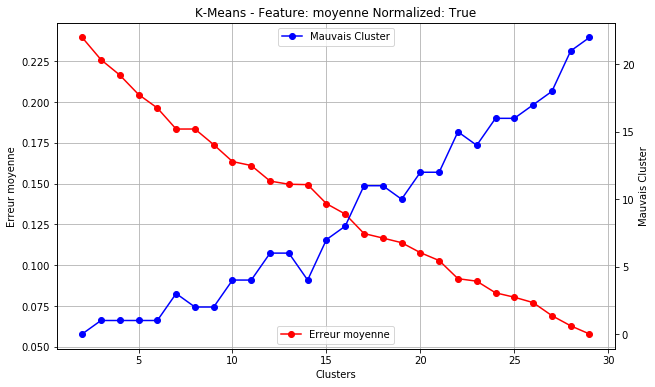

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


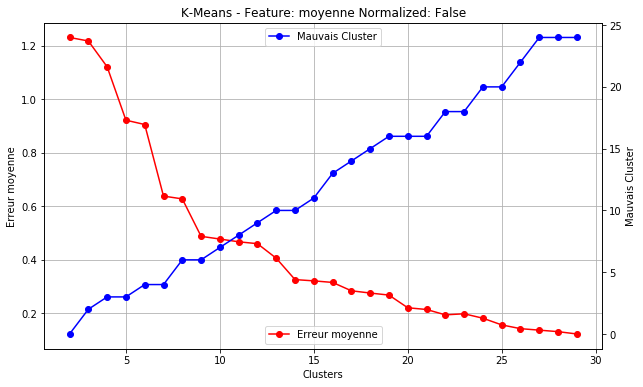

In [142]:
#Recherche du meilleur nombre de clusters
max_clusters = 30
feature = "moyenne"
clustering_data = pivot_data(actions_df, values=feature)
clustering_data = clustering_data.dropna(axis=1,how='all')
clustering_data = clustering_data.dropna(axis=0,how='any')
clustering_data["Cluster"] = pd.Series()
for normalize_data in [True, False]:
    fig = plt.figure(figsize=(10,6))
    plt.title("K-Means - Feature: %s Normalized: %s" % (feature, normalize_data))
    axes_1 = fig.add_subplot(111)
    axes_2 = axes_1.twinx()
    score_error_list = []
    failed_clusters_list = []
    
    for n_clusters in range(2,max_clusters):
        prediction, model, data = cluster_data(clustering_data.drop("Cluster",1), n_clusters=n_clusters,
                                               normalize_data=normalize_data)
        data = pd.DataFrame(data, index=clustering_data.index,columns=clustering_data.drop("Cluster",1).columns)
        data["Cluster"] = prediction
        score_error, failed_clusters =  erreur(prediction, model, data)
        score_error_list.append(score_error)
        failed_clusters_list.append(failed_clusters)
    axes_1.plot(range(2,max_clusters), score_error_list, "ro-", label = "Erreur moyenne")
    axes_2.plot(range(2,max_clusters), failed_clusters_list, "bo-", label = "Mauvais Cluster")
    
    axes_1.grid()
    axes_1.legend(loc = "lower center")
    axes_2.legend(loc = "upper center")
    axes_1.set_ylabel("Erreur moyenne")
    axes_2.set_ylabel("Mauvais Cluster")
    axes_1.set_xlabel("Clusters")
    plt.show()